In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import api as pyq 

/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [2]:
# Wavefunction generation
from scf_runs import run_lda_he, run_casci
scf_checkfile, opt_checkfile, mf_lda = run_lda_he()
ci_checkfile, mc = run_casci(scf_checkfile, nroots=4)

/Users/ksu/Documents/GitHub/pyqmc/pyqmc/api.py
/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/__init__.py
He atom neutral LDA spin=0
HF
converged SCF energy = -2.85516047724274  <S^2> = 0  2S+1 = 1
LDA
converged SCF energy = -2.82670655418611  <S^2> = 4.4408921e-16  2S+1 = 1

WARN: Mulitple states found in CASCI solver. First state is used to compute the Fock matrix and natural orbitals in active space.

CASCI state   0  E = -2.87015742152925  E(CI) = -2.87015742152925  S^2 = 0.0000000
CASCI state   1  E = -1.40116327670131  E(CI) = -1.40116327670131  S^2 = 2.0000000
CASCI state   2  E = -0.950953194776060  E(CI) = -0.950953194776060  S^2 = 0.0000000
CASCI state   3  E = 0.604815912795335  E(CI) = 0.604815912795335  S^2 = 0.0000000
dict_keys(['mol', '_scf', 'verbose', 'stdout', 'max_memory', 'ncas', 'nelecas', '_ncore', 'fcisolver', 'frozen', 'extrasym', 'e_tot', 'e_cas', 'ci', 'mo_coeff', 'mo_energy', 'mo_occ', 'converged'])
Available output from CASCI: <KeysViewHDF5

In [3]:
import importlib, recipes
modules = [recipes]
for m in modules:
    importlib.reload(m)

    # Jastrow optimizationn
    
for fname in [opt_checkfile]:
    if os.path.isfile(fname):
        os.remove(fname)

# pyq.OPTIMIZE(scf_checkfile, "sj.hdf5", ci_checkfile=ci_checkfile, max_iterations=2, verbose=False)
# bosonrecipes.ABOPTIMIZE(scf_checkfile, "sj.hdf5", max_iterations=2, nconfig=100, verbose=False)
recipes.OPTIMIZE(scf_checkfile, opt_checkfile, max_iterations=5, nconfig=1000, verbose=True)
# Jastrow optimization results
df = pyq.read_opt(opt_checkfile)
df

starting warmup
finished warmup
----------vmc done
Gradient norm:  0.5793452922211272
Dot product between gradient and SR step:  0.8848815503186204
descent en -2.818269665718077 0.013462991876313671
energies from correlated sampling [-2.627984   -2.77004159 -2.84516871 -2.87076008 -2.86051495]
----------vmc done
Gradient norm:  0.07230869651171351
Dot product between gradient and SR step:  0.9758432616832958
descent en -2.8828175849708777 0.0074952210971691935
energies from correlated sampling [-2.85489393 -2.86101635 -2.86646155 -2.87124904 -2.87539763]
----------vmc done
Gradient norm:  0.036662411095384095
Dot product between gradient and SR step:  0.9781197578958017
descent en -2.888662657547573 0.003955431240769687
energies from correlated sampling [-2.85168721 -2.85356844 -2.8553663  -2.85708074 -2.85871175]
----------vmc done
Gradient norm:  0.028849636014677434
Dot product between gradient and SR step:  0.9677447880835411
descent en -2.8884680274140635 0.004033603500112013
ener

,energy,iteration,error,fname
0,-2.818270,0,0.013463,he-sj.hdf5
1,-2.882818,1,0.007495,he-sj.hdf5
2,-2.888663,2,0.003955,he-sj.hdf5
3,-2.888468,3,0.004034,he-sj.hdf5
4,-2.905630,4,0.004084,he-sj.hdf5


In [4]:
tstep = 0.001
nconfig = 2000
nsteps = 1000
discard = 100
reblock_size = 50

In [5]:
import importlib, recipes
modules = [recipes] # Reloads recipes.py file after each update
for m in modules:
    importlib.reload(m)
import pyqmc.pyscftools as pyscftools

def initialize_boson_qmc_objects_j(
    dft_checkfile,
):  
    mol, mf = pyscftools.recover_pyscf(scf_checkfile)
    wf, to_opt = bosonwftools.generate_boson_wf(
        mol, mf,
    )
    load_parameters = opt_checkfile
    wftools.read_wf(wf, load_parameters)      
    return wf

def initialize_qmc_objects_j(
    dft_checkfile: str,
):
    mol, mf = pyscftools.recover_pyscf(dft_checkfile)
    wf, to_opt = wftools.generate_wf(
        mol, mf, 
    )
    load_parameters = opt_checkfile
    wftools.read_wf(wf, load_parameters)      
    return wf

Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in th

Text(0.5, 1.0, '100 trials')

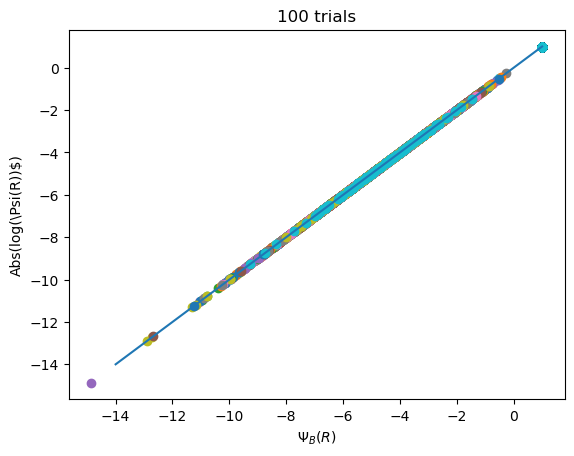

In [6]:
import importlib, bosonrecipes, bosonmc, bosonwftools
modules = [bosonrecipes, bosonmc, bosonwftools] # Reloads recipes.py file after each update
for m in modules:
    importlib.reload(m)

import importlib, wftools
modules = [wftools] # Reloads recipes.py file after each update
for m in modules:
    importlib.reload(m)
    
#phi and phib
trials = 100
for i in range(trials):
    nconfig = 100
    mol, mf = pyscftools.recover_pyscf(scf_checkfile)
    configs = bosonmc.initial_guess(mol, nconfig, seed = i)
    wfb = initialize_boson_qmc_objects_j(
        scf_checkfile,
    )
    wf = initialize_qmc_objects_j(
            scf_checkfile,
        )
    e=0
    sign, phi1 = wf.recompute(configs)
    g1, _, _ = wf.gradient_value(e, configs.electron(e))  
    phi1 = wf.value()
    # phi1a = saved['phi']
    e=0
    signb, phi2 = wfb.recompute(configs)
    g1b, _, _ = wfb.gradient_value(e, configs.electron(e))
    phi2 = wfb.value()
    plt.scatter(phi1, phi2)
x = np.linspace(-14, 1, 100)
plt.plot(x,x)
plt.xlabel(r'$\Psi_B(R)$')
plt.ylabel(r'Abs(log(\Psi(R))$)')
plt.title(str(trials) + ' trials')

Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in the bosonic wavefunction= 1
Number of determinants in th

Text(0.5, 1.0, '100 configurations')

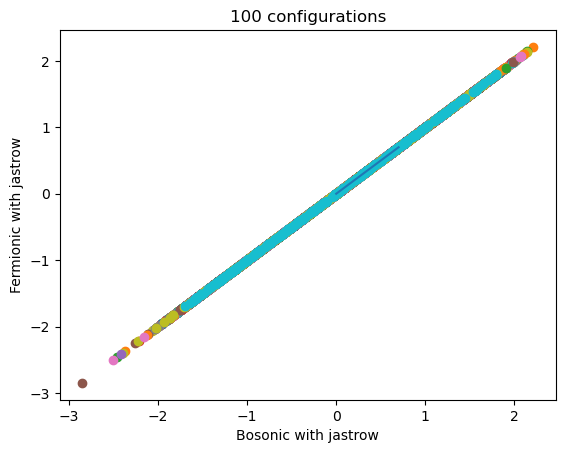

In [7]:
#Val and valb
trials = 100
for i in range(trials):
    nconfig = 100
    mol, mf = pyscftools.recover_pyscf(scf_checkfile)
    configs = bosonmc.initial_guess(mol, nconfig, seed = i)
    wfb = initialize_boson_qmc_objects_j(
        scf_checkfile,
    )
    wf = initialize_qmc_objects_j(
            scf_checkfile,
        )
    e=0
    sign, val = wf.recompute(configs)
    g1, _, _ = wf.gradient_value(e, configs.electron(e))  
    e=0
    signb, valb = wfb.recompute(configs)
    g1b, _, _ = wfb.gradient_value(e, configs.electron(e))
    # valb2 = saved['psi']
    plt.scatter(g1, g1b)
x = np.linspace(0, 0.7, 100)
plt.plot(x,x)
plt.xlabel('Bosonic with jastrow')
plt.ylabel('Fermionic with jastrow')
plt.title(str(trials) + ' configurations')